# Communicating Data Findings from Prosper Loan Data
## by Carol Ogira

## Introduction
The dataset for this study is from [prosper](https://www.prosper.com/about), which facilitates matching borrowers with investors and handles the loan servicing on behalf of them.

In this part, we will focus on exploratary anlyses to get some insights from the loan data, such as patterns and relationships.
The 81 variables in this dataset give information about the listing, credit profile of the borrower, the loans and their performance, investors, among others. Below are the description of some of the variables:

- ListingNumber:	The number that uniquely identifies the listing to the public as displayed on the website.
- ListingCreationDate:	The date the listing was created.
- CreditGrade:	The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
- Term:	The length of the loan expressed in months.
- LoanStatus:	The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- BorrowerAPR:	The Borrower's Annual Percentage Rate (APR) for the loan.
- ProsperRating (Alpha):    The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
- ProsperScore:	A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
- BorrowerState:	The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- Occupation:	The Occupation selected by the Borrower at the time they created the listing.
- EmploymentStatus:	The employment status of the borrower at the time they posted the listing.
- DebtToIncomeRatio:	The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
- IncomeRange:	The income range of the borrower at the time the listing was created.
- IncomeVerifiable:	The borrower indicated they have the required documentation to support their income.
- StatedMonthlyIncome:	The monthly income the borrower stated at the time the listing was created.
- TotalProsperLoans:	Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 
- TotalProsperPaymentsBilled:	Number of on time payments the borrower made on Prosper loans at the time they created this listing. This value will be null if the borrower had no prior loans.
- LoanOriginalAmount:	The origination amount of the loan.
- LoanOriginationDate:	The date the loan was originated.
- LoanOriginationQuarter:	The quarter in which the loan was originated.
- MemberKey:	The unique key that is associated with the borrower. This is the same identifier that is used in the API member object. 
- MonthlyLoanPayment:	The scheduled monthly loan payment.
- PercentFunded:	Percent the listing was funded.
- InvestmentFromFriendsCount:	Number of friends that made an investment in the loan.
- InvestmentFromFriendsAmount:	Dollar amount of investments that were made by friends.
- Investors:	The number of investors that funded the loan.

Description of all the variables can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).

We'll perform univariate, bivariate and multivariate exploration, then draw conclusions from the findings.


## Preliminary Wrangling
In this step, we assess the data for any data quality or tidiness issues, then clean accordingly for the proceeding analyses.


In [1]:
# importing required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# setting plots to be embedded inline
%matplotlib inline      

In [2]:
# loading data
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# structure of the dataset
loan_df.shape

(113937, 81)

In [4]:
# general information about the loan data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

#### Assessing and Cleaning the Data

In this section, we'll:

a. select only variables that will be imperative to our analysis

b. ensure all features have the correct datatype

c. identify and drop duplicates

d. find and appropriately handle records with missing values 

In [5]:
# selected features
features = ['ListingNumber','ListingCreationDate','CreditGrade','Term','LoanStatus','ProsperRating (Alpha)',
'ProsperScore','BorrowerState', 'Occupation', 'EmploymentStatus','DebtToIncomeRatio','IncomeRange','IncomeVerifiable',
'StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationDate',
'MonthlyLoanPayment','PercentFunded','Recommendations','InvestmentFromFriendsCount','InvestmentFromFriendsAmount',
'Investors']

df = loan_df[features]

# saving our dataset for visual assessment
df.to_csv('df1.csv')
df.head()

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ProsperRating (Alpha),ProsperScore,BorrowerState,Occupation,EmploymentStatus,...,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,2007-08-26 19:09:29.263000000,C,36,Completed,NaN,NaN,CO,Other,Self-employed,...,True,3083.333333,9425,2007-09-12 00:00:00,330.43,1.0,0,0,0.0,258
1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,A,7.0,CO,Professional,Employed,...,True,6125.000000,10000,2014-03-03 00:00:00,318.93,1.0,0,0,0.0,1
2,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,NaN,NaN,GA,Other,Not available,...,True,2083.333333,3001,2007-01-17 00:00:00,123.32,1.0,0,0,0.0,41
3,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,A,9.0,GA,Skilled Labor,Employed,...,True,2875.000000,10000,2012-11-01 00:00:00,321.45,1.0,0,0,0.0,158
4,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,D,4.0,MN,Executive,Employed,...,True,9583.333333,15000,2013-09-20 00:00:00,563.97,1.0,0,0,0.0,20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ListingNumber                113937 non-null  int64  
 1   ListingCreationDate          113937 non-null  object 
 2   CreditGrade                  28953 non-null   object 
 3   Term                         113937 non-null  int64  
 4   LoanStatus                   113937 non-null  object 
 5   ProsperRating (Alpha)        84853 non-null   object 
 6   ProsperScore                 84853 non-null   float64
 7   BorrowerState                108422 non-null  object 
 8   Occupation                   110349 non-null  object 
 9   EmploymentStatus             111682 non-null  object 
 10  DebtToIncomeRatio            105383 non-null  float64
 11  IncomeRange                  113937 non-null  object 
 12  IncomeVerifiable             113937 non-null  bool   
 13 

ListingCreationDate and LoanOriginationDate have incorrect datatypes, we'll change them to datetime

In [8]:
# df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
df.loc[:, ['ListingCreationDate', 'LoanOriginationDate']] = df[['ListingCreationDate', 'LoanOriginationDate']].apply(pd.to_datetime)

From the visual assessment of the data, we'll drop records before July 2009, since they introduce nulls in the prosper rating column; then delete creditgrade column from the dataset. Furthermore, prosperscore, which gives a risk score of a borrower has no data prior the period.

To achieve this, first we'll have to extract Year-month from the timestamp then query for records from July 2009 onwards.

We'll also:
- Extract Year and Month and Day variables from the listing creation date column
- Calculate number of days between Loan listing and origination date
- Rename ProsperRating (Alpha) column
- Order the entire dataframe by year

In [9]:
# getting data post July 2009
df = df.loc[df['ListingCreationDate'].dt.strftime('%Y-%m') >= '2009-07']

# rename ProsperRating (Alpha) column
df.rename(columns = {'ProsperRating (Alpha)': 'ProsperRating'}, inplace= True)

# extracting year, month and week number
df.insert(1, 'ListingCreationYear', df['ListingCreationDate'].dt.strftime('%Y'))
df.insert(2, 'ListingCreationMonth', df['ListingCreationDate'].dt.strftime('%B'))
df.insert(3, 'ListingCreationDay', pd.to_numeric(df['ListingCreationDate'].dt.strftime('%d')))

df.insert(17, 'WaitingDays', (df['LoanOriginationDate'] - df['ListingCreationDate']).dt.days)


# drop listing creation date, loan origination date and creditgrade columns
df.drop(columns= ['CreditGrade', 'ListingCreationDate', 'LoanOriginationDate'], axis = 1, inplace = True)

# categorize months
cat_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_cat = pd.api.types.CategoricalDtype(ordered = True, categories = cat_months)
df['ListingCreationMonth'] = df['ListingCreationMonth'].astype(month_cat)

# order dataframe by year and month
df.sort_values(by = ['ListingCreationYear', 'ListingCreationMonth'], axis = 0, inplace = True, ignore_index = True)
df['ListingCreationDay'] = df['ListingCreationDay'].astype('int')

# subset of the data
df.head(3)

,ListingNumber,ListingCreationYear,ListingCreationMonth,ListingCreationDay,Term,LoanStatus,ProsperRating,ProsperScore,BorrowerState,Occupation,...,IncomeVerifiable,StatedMonthlyIncome,WaitingDays,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,417261,2009,July,20,36,Completed,C,6.0,IL,Teacher,...,True,6000.000000,20,10000,366.05,1.0,0,0,0.0,347
1,416319,2009,July,13,36,Completed,AA,8.0,CA,Other,...,True,9166.666667,22,6000,189.41,1.0,0,0,0.0,271
2,416970,2009,July,17,36,Completed,AA,10.0,NY,Military Enlisted,...,True,4583.333333,221,1000,29.64,1.0,1,1,26.9,23


Next, we'll check for duplicates and missing values in our dataframe. The duplicates will be checked based on ListingNumber, which should be unique for every listing

In [10]:
# checking for missing values
df.columns[df.isna().sum() > 0]

Index(['Occupation', 'DebtToIncomeRatio'], dtype='object')

Occupation and DebtToIncomeRatio columns have missing values, caused by unavailability of the data as at time of entry/listing. We'll therefore drop records with missing values in the columns.

In [11]:
# dropping rows with missing values
df.dropna(subset = ['Occupation', 'DebtToIncomeRatio'], inplace = True)

In [12]:
# checking for duplicates
df[df.duplicated(subset = ['ListingNumber'])]


,ListingNumber,ListingCreationYear,ListingCreationMonth,ListingCreationDay,Term,LoanStatus,ProsperRating,ProsperScore,BorrowerState,Occupation,...,IncomeVerifiable,StatedMonthlyIncome,WaitingDays,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
39019,701942,2013,January,20,36,Current,AA,10.0,CA,Engineer - Mechanical,...,True,4583.333333,247,15000,456.67,1.0,0,0,0.0,249
46511,786407,2013,May,22,60,Current,D,4.0,FL,Other,...,True,6000.000000,124,15000,410.45,1.0,0,0,0.0,1
48343,812537,2013,June,18,60,Current,B,4.0,MO,Retail Management,...,True,6916.666667,110,16000,372.21,1.0,0,0,0.0,155
49137,815571,2013,June,19,36,Current,A,10.0,IL,Professional,...,True,3333.333333,140,10000,325.02,1.0,0,0,0.0,130
49184,822680,2013,June,28,36,Current,C,4.0,IL,Sales - Retail,...,True,2458.333333,144,2000,72.30,1.0,0,0,0.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84222,1237178,2014,March,6,60,Current,C,3.0,CA,Administrative Assistant,...,True,4416.666667,3,2800,67.13,1.0,0,0,0.0,1
84401,1230428,2014,March,5,36,Current,B,8.0,IL,Medical Technician,...,True,3750.000000,4,5000,169.68,1.0,0,0,0.0,1
84490,1188772,2014,March,1,36,Current,A,5.0,OH,Medical Technician,...,True,4000.000000,8,9600,313.79,1.0,0,0,0.0,1
84741,1224533,2014,March,4,36,Current,AA,6.0,TX,Construction,...,True,10166.666667,5,20000,627.56,1.0,0,0,0.0,221


In [13]:
# dropping duplicates from the dataframe
df.drop_duplicates(subset = ['ListingNumber'], ignore_index = True, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75494 entries, 0 to 75493
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ListingNumber                75494 non-null  int64   
 1   ListingCreationYear          75494 non-null  object  
 2   ListingCreationMonth         75494 non-null  category
 3   ListingCreationDay           75494 non-null  int64   
 4   Term                         75494 non-null  int64   
 5   LoanStatus                   75494 non-null  object  
 6   ProsperRating                75494 non-null  object  
 7   ProsperScore                 75494 non-null  float64 
 8   BorrowerState                75494 non-null  object  
 9   Occupation                   75494 non-null  object  
 10  EmploymentStatus             75494 non-null  object  
 11  DebtToIncomeRatio            75494 non-null  float64 
 12  IncomeRange                  75494 non-null  object  
 13  I

Finally, we identify categorical variables and format their datatypes accordingly for better analysis

In [15]:
print('Loan Statuses:\n', df['LoanStatus'].unique())
print('Prosper Ratings:\n', df['ProsperRating'].unique())
print('Employment Statuses:\n', df['EmploymentStatus'].unique())
print('Income Ranges:\n', df['IncomeRange'].unique())

Loan Statuses:
 ['Completed' 'Chargedoff' 'Defaulted' 'Current' 'Past Due (1-15 days)'
 'Past Due (91-120 days)' 'Past Due (61-90 days)' 'FinalPaymentInProgress'
 'Past Due (31-60 days)' 'Past Due (16-30 days)' 'Past Due (>120 days)']
Prosper Ratings:
 ['C' 'AA' 'E' 'A' 'B' 'HR' 'D']
Employment Statuses:
 ['Full-time' 'Retired' 'Employed' 'Part-time' 'Not employed' 'Other'
 'Self-employed']
Income Ranges:
 ['$50,000-74,999' '$100,000+' '$75,000-99,999' '$25,000-49,999'
 '$1-24,999' 'Not employed']


In [16]:
# # a copy of the dataframe
# prosper_df = df.copy()

In [17]:
# categorize variables
cat_features = ['LoanStatus', 'ProsperScore', 'EmploymentStatus', 'IncomeRange']

# ordering for each column
employment_categories = ['Employed', 'Full-time', 'Part-time', 'Self-employed', 
'Retired', 'Not-employed', 'Other']
incomerange_categories = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999',
 '$1-24,999', '$0', 'Not employed']
prosperrating_categories = ['E', 'D', 'C', 'B', 'A', 'AA']
loanstatus_categories = ['Completed', 'Current', 'FinalPaymentInProgress', 'Chargedoff', 'Defaulted',
'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)',
 'Past Due (91-120 days)', 'Past Due (>120 days)']

# a dictiobary for each column and their categories
cat_dict = {'LoanStatus':loanstatus_categories, 'ProsperRating':prosperrating_categories, 
'EmploymentStatus':employment_categories, 'IncomeRange': incomerange_categories}

# categorizing
for key, value in cat_dict.items():
    df[key] = df[key].astype(pd.api.types.CategoricalDtype(ordered = True, categories = value))


In [18]:
# structure of the final df
df.shape

(75494, 23)

Our final dataframe is now set to be used in the anlyses that follow

### Structure of the dataset

The original dataset had 113937 rows and 81 columns. However, after assessing and cleaning the data to fit our objectives, the final dataset that will be used in this analysis has 75494 rows and 23 columns

### Main features of interest in the dataset

This analysis focuses on determining features that can best determine the likelihood of borrowers to get funding from investors, based on their profiles.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To get insights on the above problem, we'll focus on the various variables that characterize the borrowers as well as the loans borrowed, which include:

- loan status of the borrower,
- their employment status and occupations,
- their income range, stated monthly income and whether the income are verifiable, 
- amount of loan applied for and the scheduled repayment rates

## Univariate Exploration

In this section, we'll generate some informative distributions of individual features in our dataset, and get some insights from them based on certain hypotheses.

First, a general summary statistics is fundamental and will help in tweeking some of the visualizations.


In [19]:
# summary statistics of the data
df.describe()

,ListingNumber,ListingCreationDay,Term,ProsperScore,DebtToIncomeRatio,StatedMonthlyIncome,WaitingDays,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,7.549400e+04,75494.000000,75494.000000,75494.000000,75494.000000,75494.000000,75494.000000,75494.000000,75494.000000,75494.000000,75494.000000,75494.00000,75494.000000,75494.000000
mean,7.713307e+05,15.514796,42.736429,6.082987,0.258004,6002.324106,10.428113,9273.183869,295.901926,0.998113,0.016703,0.00759,3.914556,70.406443
std,2.340658e+05,8.646882,11.741958,2.357859,0.321913,5117.354548,17.229667,6404.416650,189.443481,0.020670,0.188553,0.10874,113.380882,97.916981
min,4.162750e+05,1.000000,12.000000,1.000000,0.000000,0.250000,0.000000,1000.000000,0.000000,0.700000,0.000000,0.00000,0.000000,1.000000
25%,5.592705e+05,8.000000,36.000000,4.000000,0.150000,3583.333333,3.000000,4000.000000,158.870000,1.000000,0.000000,0.00000,0.000000,1.000000
50%,7.381380e+05,16.000000,36.000000,6.000000,0.220000,5041.333334,7.000000,8000.000000,256.660000,1.000000,0.000000,0.00000,0.000000,32.000000
75%,9.712498e+05,23.000000,60.000000,8.000000,0.320000,7250.000000,12.000000,14500.000000,392.420000,1.000000,0.000000,0.00000,0.000000,101.000000
max,1.255149e+06,31.000000,60.000000,11.000000,10.010000,483333.333333,529.000000,35000.000000,2251.510000,1.012500,19.000000,9.00000,11000.000000,1189.000000


In [20]:
base_color = sns.color_palette()[0]

**Question 1. Do the loan listings tend to increase or decrease during certain time periods?**

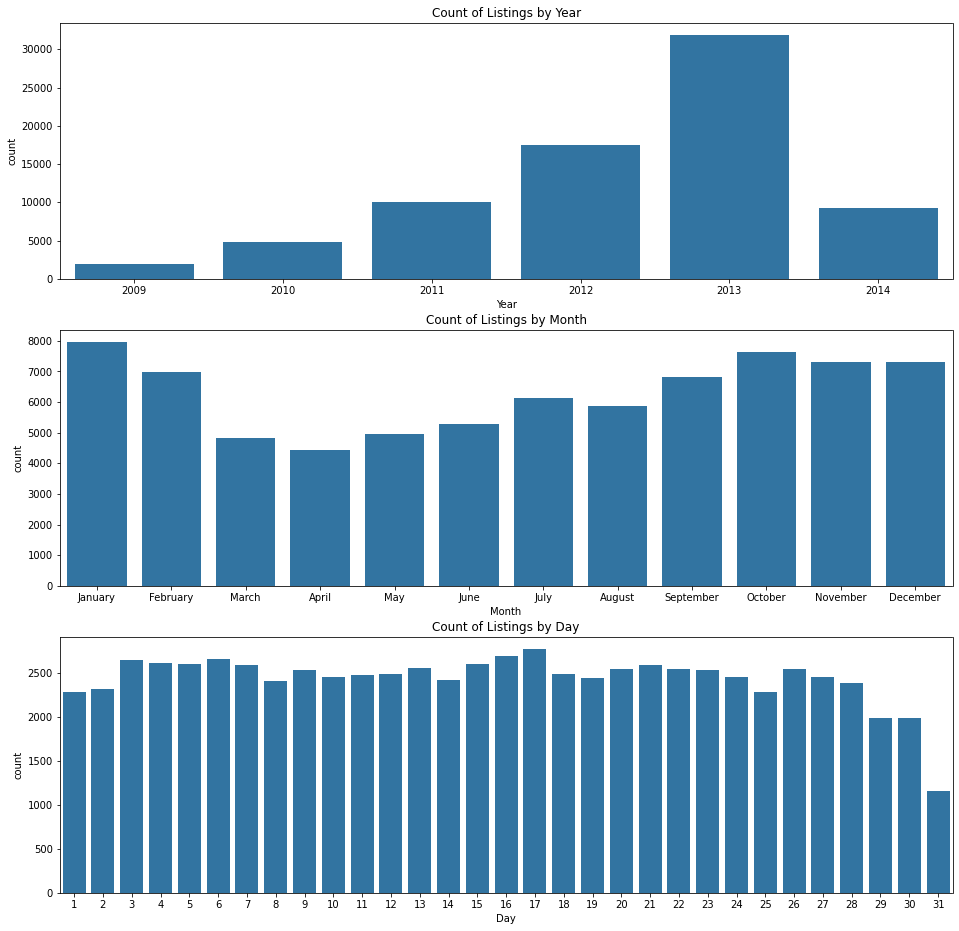

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(16, 16))

# Year
sns.countplot(data = df, x = 'ListingCreationYear', color = base_color, ax = axes[0]);
axes[0].set_title('Count of Listings by Year');
axes[0].set_xlabel('Year');

# Month
sns.countplot(data = df, x = 'ListingCreationMonth', color = base_color, ax = axes[1]);
axes[1].set_title('Count of Listings by Month');
axes[1].set_xlabel('Month');

# Day of the month
sns.countplot(data = df, x = 'ListingCreationDay', color = base_color, ax = axes[2]);
axes[2].set_title('Count of Listings by Day');
axes[2].set_xlabel('Day');

There was a steady rise in the number of listings from 2011 to 2013, the peak being in 2013. However, the count of listings decreased significantly in 2014.

A high number of listings are noted during the first and last months of the year.

Considering dates, the distribution across the month is almost uniform.

**Question 2. Which states had the most number of loan listings?**

In [22]:
print('There are', df['BorrowerState'].nunique(), 'states represented in the dataset')

There are 48 states represented in the dataset


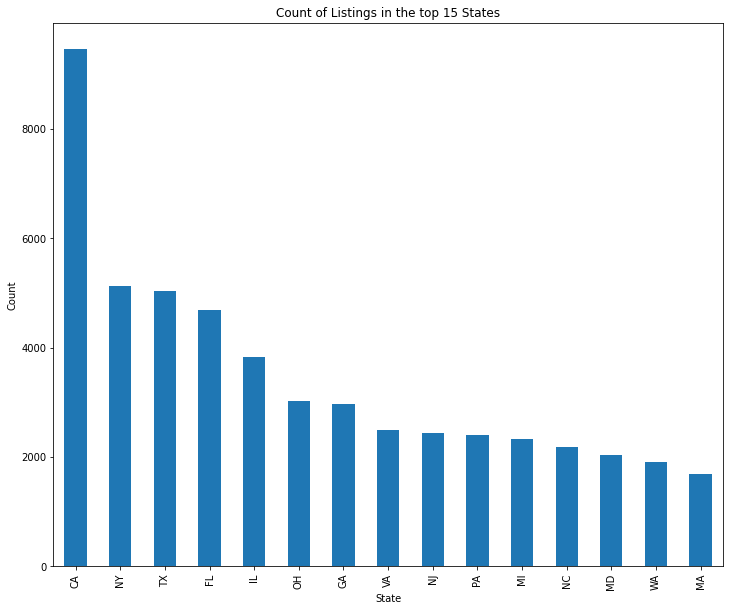

In [23]:
state_subset = df['BorrowerState'].value_counts(ascending = False)[:15]
plt.figure(figsize = (12, 10))
state_subset.plot(color= base_color, kind = 'bar', title = 'Count of Listings in the top 15 States',
xlabel = 'State', ylabel = 'Count');

Most of the borrowers in this prosper data were from Carlifornia, New York, Texas and Florida states.

**Question3. What's the distribution of listings amongst the income ranges and loan statuses?**

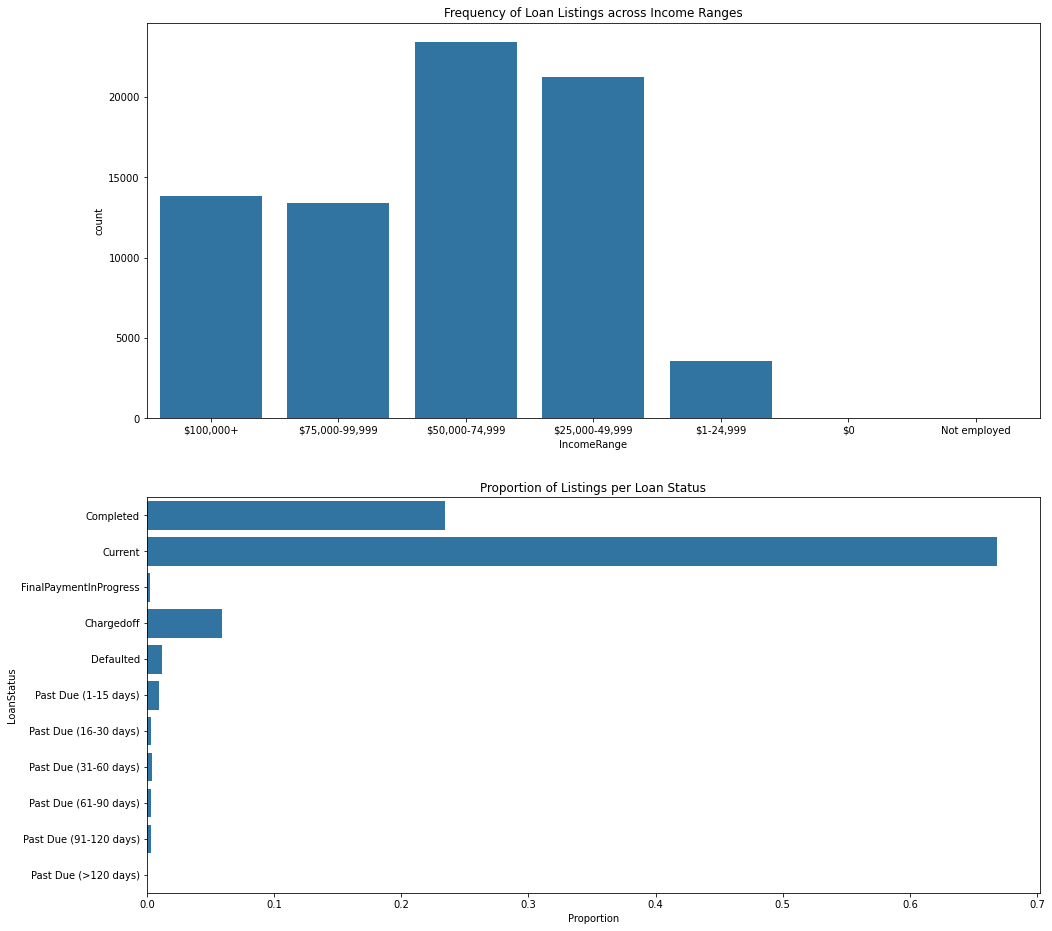

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(16, 16))

# Income Range
sns.countplot(data = df, x = 'IncomeRange', color = base_color, ax = axes[0]);
axes[0].set_title('Frequency of Loan Listings across Income Ranges');

# Loan Status
pctg_loanstatus = df['LoanStatus'].value_counts(normalize = True, ascending = False).reset_index()
pctg_loanstatus.columns = ['LoanStatus', 'Proportion']

sns.barplot(data = pctg_loanstatus, x = 'Proportion', y = 'LoanStatus', color = base_color, ax = axes[1]);
axes[1].set_title('Proportion of Listings per Loan Status');

From the plots above, most loans were borrowed by people with an income range of between 50000USD and 75000USD. 

**Question 4. How are the numeric variables in the dataset distributed?**

In [25]:
num_features = ['ProsperScore', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'PercentFunded', 'WaitingDays', 'Investors']
df[num_features].describe()

,ProsperScore,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,WaitingDays,Investors
count,75494.000000,75494.000000,75494.000000,75494.000000,75494.000000,75494.000000,75494.000000,75494.000000
mean,6.082987,0.258004,6002.324106,9273.183869,295.901926,0.998113,10.428113,70.406443
std,2.357859,0.321913,5117.354548,6404.416650,189.443481,0.020670,17.229667,97.916981
min,1.000000,0.000000,0.250000,1000.000000,0.000000,0.700000,0.000000,1.000000
25%,4.000000,0.150000,3583.333333,4000.000000,158.870000,1.000000,3.000000,1.000000
50%,6.000000,0.220000,5041.333334,8000.000000,256.660000,1.000000,7.000000,32.000000
75%,8.000000,0.320000,7250.000000,14500.000000,392.420000,1.000000,12.000000,101.000000
max,11.000000,10.010000,483333.333333,35000.000000,2251.510000,1.012500,529.000000,1189.000000


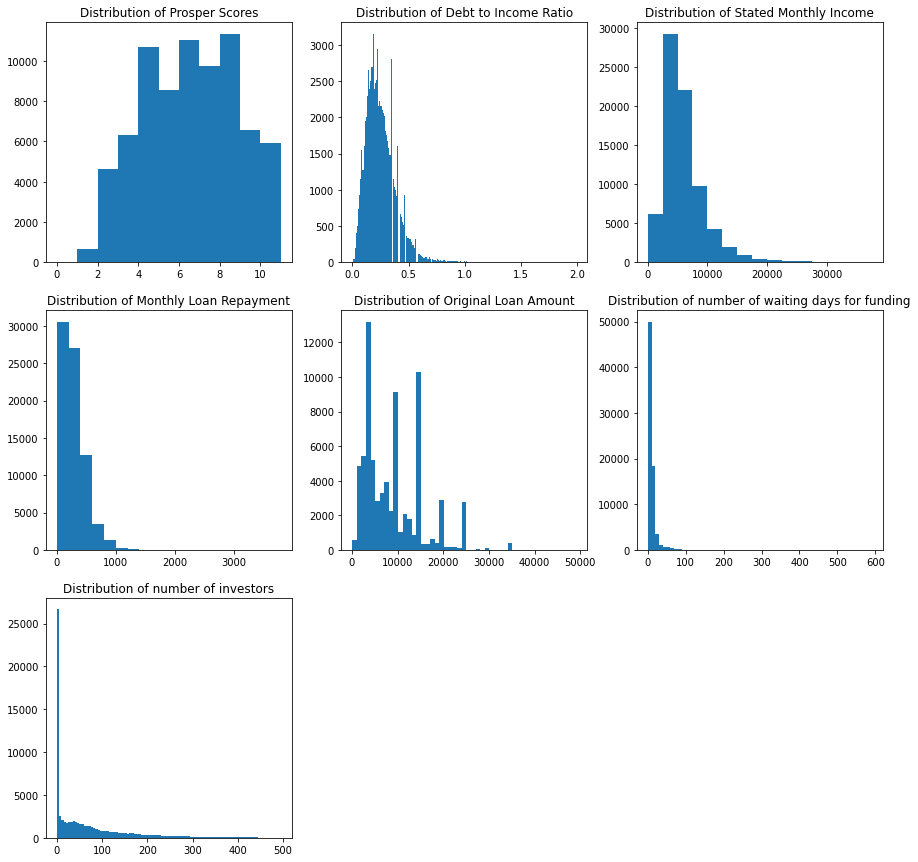

In [26]:
# fig, ax = plt.subplots(2, 3, figsize=(16, 16))
plt.figure(figsize=(15, 15))

# prosper score
score_bins = np.arange(0, 12, 1)
plt.subplot(331)
plt.hist(df['ProsperScore'], bins = score_bins);
plt.title('Distribution of Prosper Scores');

# debt to income ratio
dti_bins = np.arange(0, 2, 0.01)
plt.subplot(332)
plt.hist(df['DebtToIncomeRatio'], bins = dti_bins);
plt.title('Distribution of Debt to Income Ratio');

# stated monthly income
smi_bins = np.arange(0,40000, 2500)
plt.subplot(333)
plt.hist(df['StatedMonthlyIncome'], bins = smi_bins);
plt.title('Distribution of Stated Monthly Income');

# monthly loan payment
mlp_bins = np.arange(0, 4000, 200)
plt.subplot(334)
plt.hist(df['MonthlyLoanPayment'], bins = mlp_bins);
plt.title('Distribution of Monthly Loan Repayment');

# loan original amount
pctg_bins = np.arange(100, 50000, 1000)
plt.subplot(335)
plt.hist(df['LoanOriginalAmount'], bins = pctg_bins);
plt.title('Distribution of Original Loan Amount');

# waiting days
wd_bins = np.arange(0, 600, 10)
plt.subplot(336)
plt.hist(df['WaitingDays'], bins = wd_bins);
plt.title('Distribution of number of waiting days for funding');

# investors
inv_bins = np.arange(0, 500, 5)
plt.subplot(337)
plt.hist(df['Investors'], bins = inv_bins);
plt.title('Distribution of number of investors');

For prosper scores, there are records with a score of above 10. As per the data dictionary, the maximum score should be 10. We'll therefore drop the record.

In [27]:
df = df[df['ProsperScore'] <= 10]

**Question 5. What is the most popular prosper rating?**

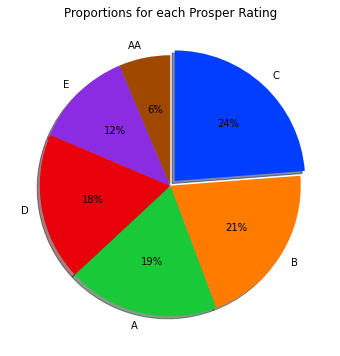

In [28]:
rating_counts = df['ProsperRating'].value_counts()
col_palette = sns.color_palette('bright')
plt.figure(figsize = (6,6))

explode = [0.05, 0, 0, 0, 0, 0]
plt.pie(rating_counts, labels = rating_counts.index, startangle = 90, autopct= '%0.0f%%', colors= col_palette, 
explode = explode, shadow = True, counterclock = False);
plt.title('Proportions for each Prosper Rating');

Prosper ratings of between 3 - 5 are the most common, and with almost the same proportions.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the numerical variables are highly skewed, apart from prosper score, which has an almost uniform distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Distribution of prosper scores showed values greater than 10, which is more than the maximum risk score. The records were dropped from the dataframe.

## Bivariate Exploration

In this section, we perform pairwise correlations to investigate relationships between various features in the dataset.

To begin with, we generate a correlation heatmap of the numerical variables to have an overview of the associations amongst them, shown by the correlation coefficient values.

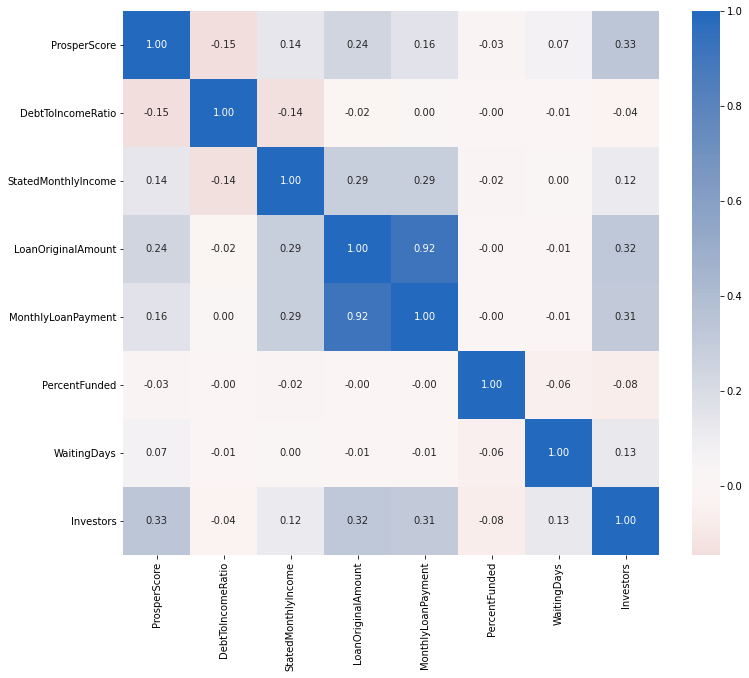

In [29]:
# correlation between the numerical variables
plt.figure(figsize = (12,10))
sns.heatmap(df[num_features].corr(), annot = True, fmt = '.2f', center = 0, cmap = 'vlag_r');


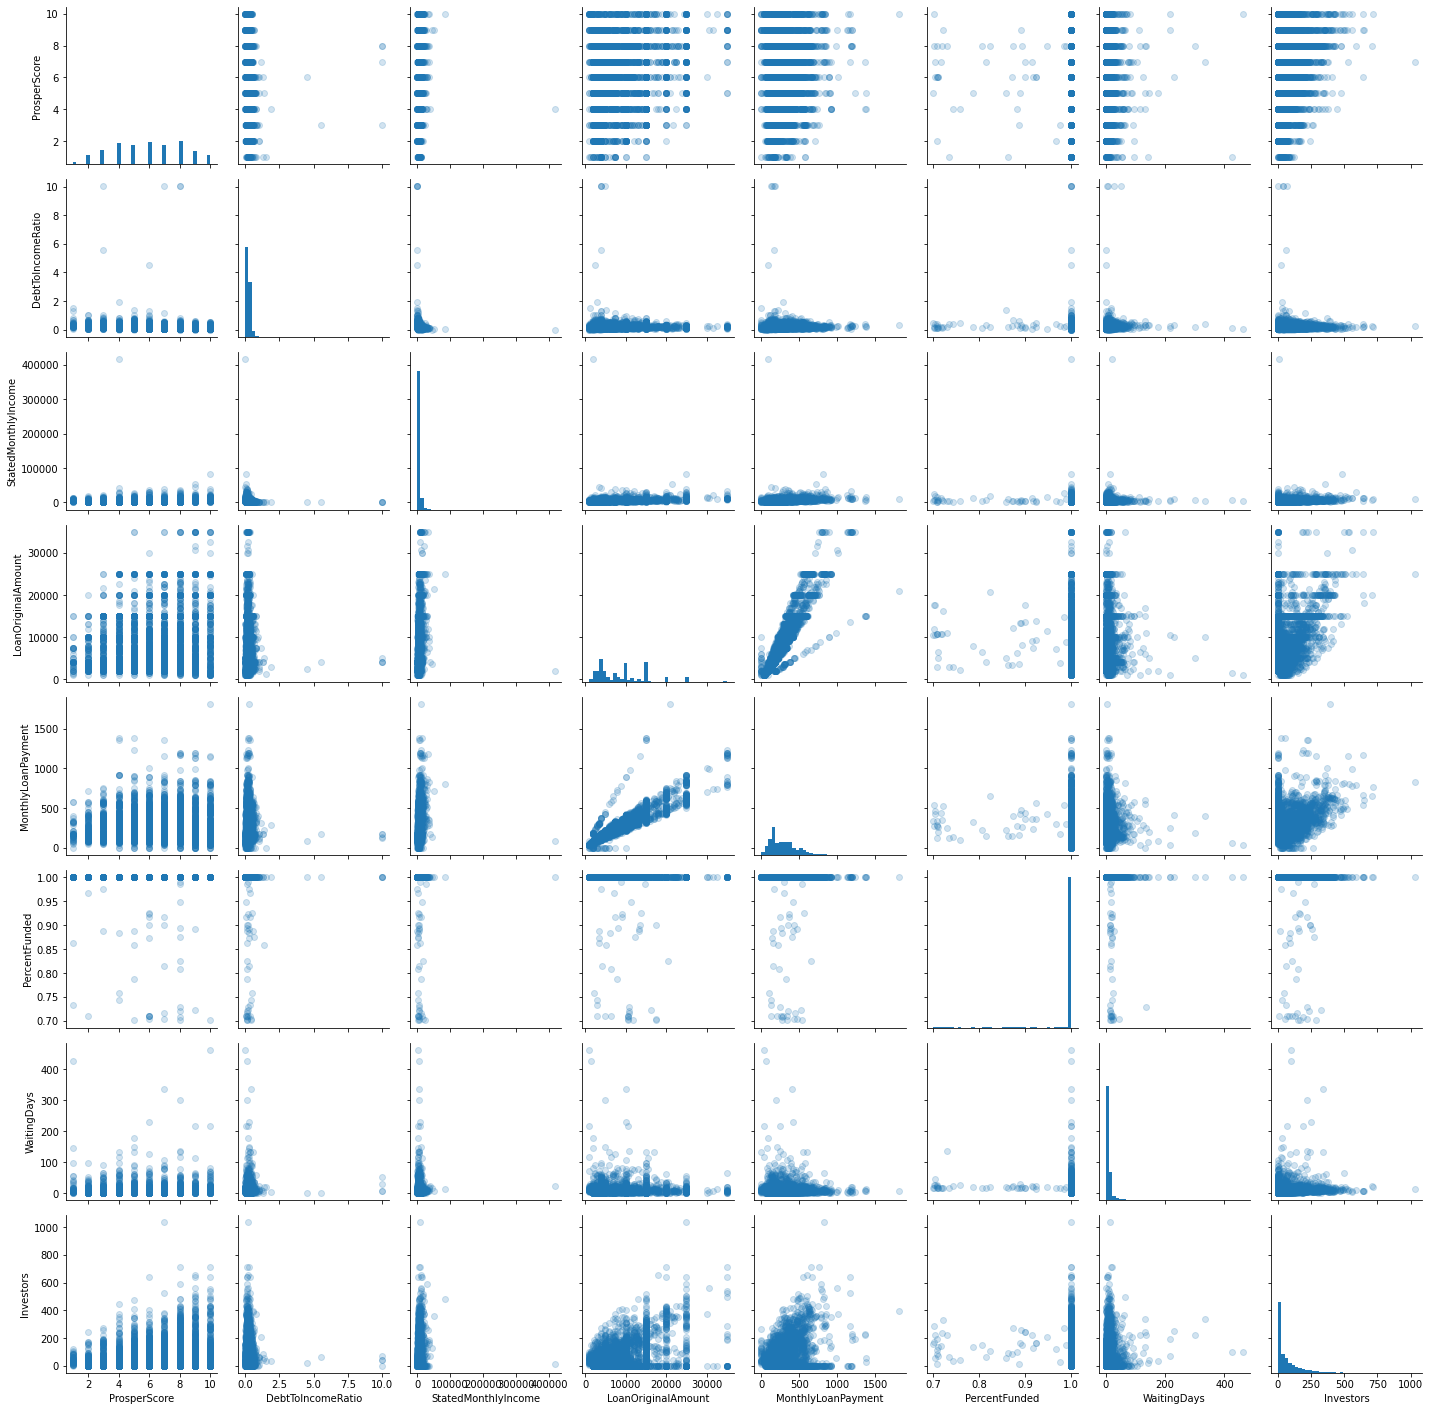

In [30]:
# plot matrix from a sample of the data
sample_df = df.sample(4000)

g = sns.PairGrid(data = sample_df, vars = num_features)
g = g.map_diag(plt.hist, bins = 40)
g.map_offdiag(plt.scatter, alpha = 0.2);

Original Loan Amount borrowed has a very high correlation with the monthly repayments

Percent funded and Waiting Days are the least correlated to other variables. This implies that variation in the other variables have almost ni impact in the percentage of the loan that were funded by investors, or the number of days the borrower had to wait for the loan.

**Question 6. Are there employment statuses with higher risk score than others?**

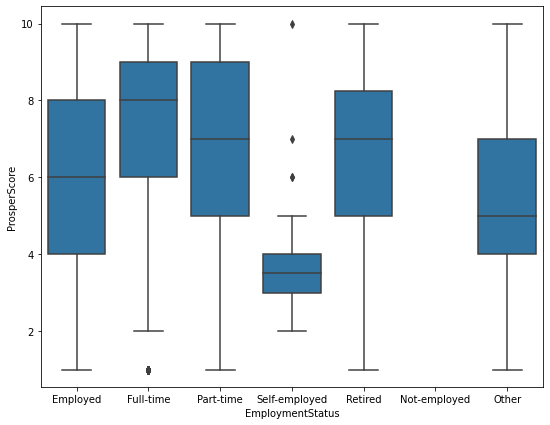

In [31]:
# employment status vs prosper score
plt.figure(figsize = (9, 7))
sns.boxplot(data = df, x = 'EmploymentStatus', y = 'ProsperScore', color = base_color);

Borrowers who are full time employed have the the best prosper score on average, which is quite expected, since they tend to have a stable flow of income to repay loans. 

Self-employed individuals, however, have the lowest prosper score, with a few outliers having high scores.

**Question 7. Do borrowers with defaulted loans get less investors?**

From the boxplot showing distribution of investors, the dataframe has a lot of outliers for this variable. For this visualization, we'll work with a subset of the data with about 150 investors to avoid skewed observations

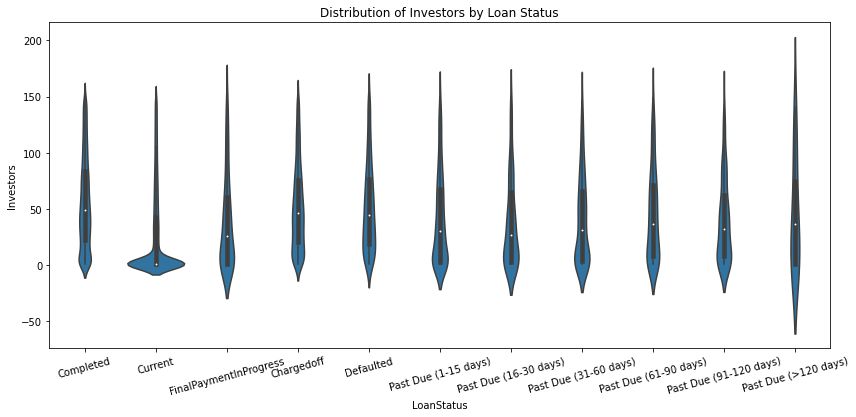

In [32]:
investors_subset = df[df['Investors'] <= 150]

# investors vs loan status
plt.figure(figsize = (14, 6))
sns.violinplot(data = investors_subset, x = 'LoanStatus', y = 'Investors', color=base_color);
plt.title('Distribution of Investors by Loan Status');
plt.xticks(rotation=15);


Almost all the loan statuses have an average of about 50 investors. However, those with current loans have the least number of investors on average

**Question 8. Have the number of investors increased over the years?**

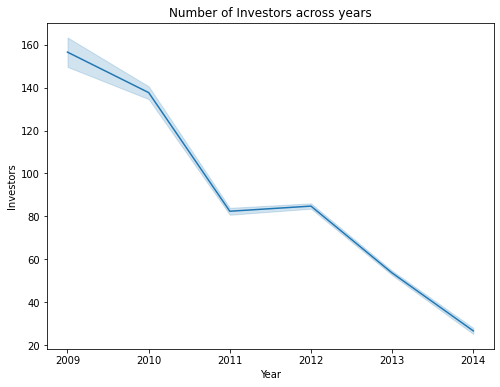

In [33]:
plt.figure(figsize = (8,6))
sns.lineplot(data = df, x = 'ListingCreationYear', y = 'Investors');
plt.title('Number of Investors across years');
plt.xlabel('Year');

The number of investors has been on a steady decline through the years

**Question 9. What's the trend of loan amounts borrowed across the years and months?**

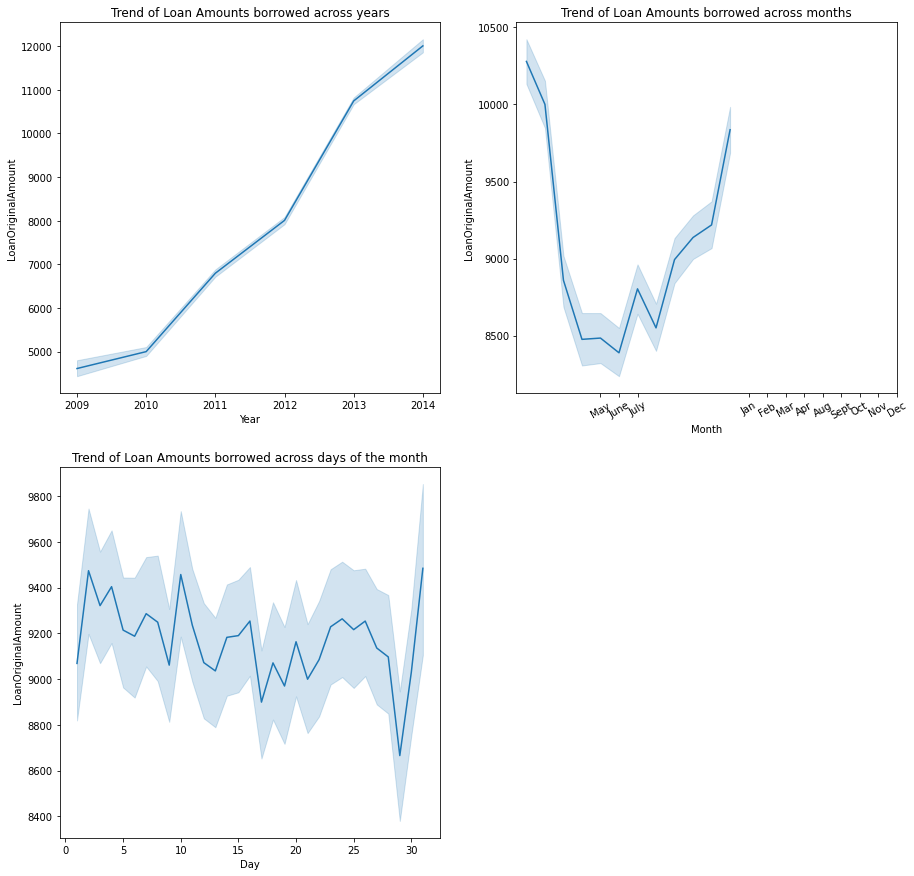

In [34]:
plt.figure(figsize = (15, 15))

# trend of loan amounts by years
# plt.figure(figsize = (8,6))
plt.subplot(221)
sns.lineplot(data = df, x = 'ListingCreationYear', y = 'LoanOriginalAmount');
plt.title('Trend of Loan Amounts borrowed across years');
plt.xlabel('Year');

# trend by month
plt.subplot(222)
sns.lineplot(data = df, x = 'ListingCreationMonth', y = 'LoanOriginalAmount')
plt.title('Trend of Loan Amounts borrowed across months');
plt.xticks(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],rotation = 30);
plt.xlabel('Month');

# trend by day
plt.subplot(223)
sns.lineplot(data = df, x = 'ListingCreationDay', y = 'LoanOriginalAmount')
plt.title('Trend of Loan Amounts borrowed across days of the month');
plt.xlabel('Day');

The amount of loans borrowed have been significantly increasing, and this can be attributed to by inflation over the years.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Stated monthly income has a positive correlation with the loan amount borrowed. From the historical data, self employed individuals have the lowest risk scores.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Loan borrowers with less debt to income ratio have higher prosper score.

## Multivariate Exploration

Here, we'll check investigate the association between a combination of various variables and the number of investors.

**Question 10. How do loan status and prosper rating correlate with number of investors?**

To get more curated visuals, we'll categorize prosper rating into high and low.

In [35]:
low_ratings = ['HR', 'E', 'D']
high_ratings = ['C', 'B', 'A', 'AA']
def rating_level(row):
    if row['ProsperRating'] in low_ratings:
        return 'Low'
    else:
        return 'High'

df['ProsperRating_Level'] = df.apply(lambda row: rating_level(row), axis = 1)

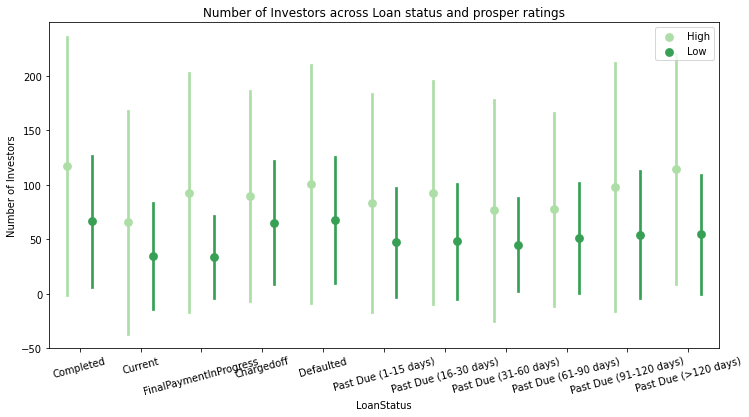

In [36]:
fig = plt.figure(figsize = [12,6])
ax = sns.pointplot(data = df, x = 'LoanStatus', y = 'Investors', hue = 'ProsperRating_Level',
           palette = 'Greens', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Number of Investors across Loan status and prosper ratings');
plt.ylabel('Number of Investors');
plt.xticks(rotation = 15);
plt.legend(loc = 'upper right');

**Question 11. Is there a relationship between income range, loan amount and number of investors?**

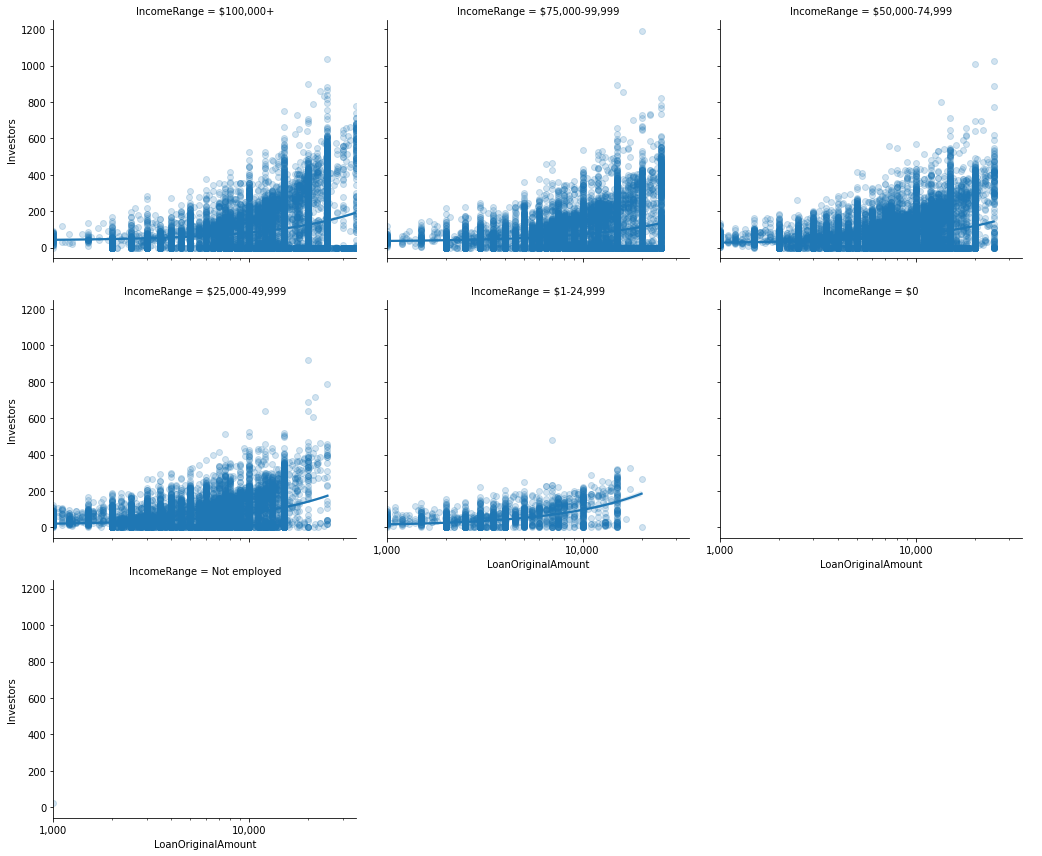

In [37]:
g = sns.FacetGrid(data = df, aspect = 1.2, height = 4, col = 'IncomeRange', 
                        col_wrap = 3)
g.map(sns.regplot, 'LoanOriginalAmount', 'Investors', y_jitter=0.04, scatter_kws={'alpha':0.2});
plt.xscale('log');
plt.xticks([1e3, 1e4], ['1,000', '10,000'])
g.add_legend();

In [38]:
# saving the final dataset used for analysis
df.to_csv('prosperloandata_cleaned.csv', index = False)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Comparing the number of investors across income ranges, there is an exponential growth, with income range of above 100,000USD steeper than the other ranges. This implies that borrowers within the high income range get more and more investors with an increase in the amount of loan borrowed.

### Were there any interesting or surprising interactions between features?

There's an interesting observation on individuals whose loans are past due by over 120 days having more investors if their prosper rating is high.

## Conclusions

The original dataset had 113937 records and 81 variables, recording loan data between  2006 and 2014. We chose to focus on investigating the features that could best show the likelihood of borrowers attracting more investors. After tweeking the data to suit our analysis, we ended up with 75494 records from 2009 to 2014. 

Most importantly, we investigated distribution of individual variables, correlation between pairs of variables and finally relationship among combination of variables. One key interesting observation from the analysis is that defaulters and those whose loans are past due can get a good number of investors as long as the prosper rating is high.
